# **** Atelier Préparation des données****
Cas d'étude: Base de données Churn</p><br>


<h4>Import pandas</h4> 


In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h4>Chargement des données avec read_excel()</h4>

In [137]:
df = pd.read_excel('Churn.xlsx')

Notes
------
Description des données Churn  

        - State                indique le nom de l'État
        - Account Length       Se réfère à la durée des comptes
        - Area Code            Indicatif régional
        - Phone                le numéro de téléphone du client
        - Int'l Plan           Indique si le client enregistre un plan avec des appels et des messages à l'étranger.
        - VMail Plan           Indique si le client enregistre un plan avec message vocal.
        - VMail Message        Indique le nombre d'e-mails que le client a envoyés.
        - Day Mins             Indique le nombre de minutesle client a parlé pendant la journée.
        - Day Calls            Indique le nombre d'appels que le client effectué quotidiennement
        - Day Charge           Total des frais par jour
        - Eve Mins             Indique le nombre total de minutes le client a parlé pendant la soirée.
        - Eve Calls            Indique le nombre total d'appels en soirée
        - Eve Charge           charge totale pendant la soirée
        - Night Mins           Indique le nombre total de minutes le client a parlé pendant la nuit.
        - Night Calls          Indique le nombre total d'appels é pendant la nuit
        - Night Charge         pcharge totale pendant la nuit
        - Intl Mins            minutes du service utilisé par le client pour passer des appels internationaux.
        - Intl Calls           nombre total d'appels internationaux
        - Intl Charge          charge internationale totale
        - CustServ Calls       nombre d'appels au service client
        - Churn?               Indiquant si le client a quitté l'entreprise

In [138]:
#Affichages des colonnes
df.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [139]:
#informations sur la DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

In [140]:
# Pour afficher le nombre de lignes (observations) et de colonnes(descripteurs)
df.shape

(3333, 21)

In [141]:
# head() affiche les 5 premières lignes. 
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [142]:
# tail() affiche les 5 dernières lignes. 
df.tail()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False.
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False.
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False.
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False.
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False.


In [143]:
#voir les types de données des colonnes
df.dtypes

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
dtype: object

In [144]:
#describe() produit un résumé des statistiques descriptives
df.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [145]:
# vérification de l'existence des valeurs manquantes
#on peut utuliser isnull ou isna
df.isnull().sum().sum()

0

le fichier ne contient pas des données manquantes

In [146]:
#Nous pouvons  compter les éléments uniques avec .nunique() 
df.nunique()

State               51
Account Length     212
Area Code            3
Phone             3333
Int'l Plan           2
VMail Plan           2
VMail Message       46
Day Mins          1667
Day Calls          119
Day Charge        1667
Eve Mins          1611
Eve Calls          123
Eve Charge        1440
Night Mins        1591
Night Calls        120
Night Charge       933
Intl Mins          162
Intl Calls          21
Intl Charge        162
CustServ Calls      10
Churn?               2
dtype: int64

Après avoir compté les valeurs uniques dans la data frame , On peut donc considérer que le type de données doit être catégorique pour les colonnes "Area Code","Int'l Plan","VMail Plan" et "Churn?" .

In [375]:
#Avec unique on peut voir les différentes modalités d'une colonne
df["Area Code"].unique()


array([415, 408, 510], dtype=int64)

In [152]:
df["Int'l Plan"].unique()

array(['no', 'yes'], dtype=object)

# La fonction value_counts () est utilisée pour obtenir une série contenant des nombres de valeurs uniques pour une colonne.

In [174]:
df["Churn?"].value_counts()

False.    2850
True.      483
Name: Churn?, dtype: int64

In [62]:
df["Int'l Plan"].value_counts()

no     3010
yes     323
Name: Int'l Plan, dtype: int64

In [65]:
df["VMail Plan"].value_counts()

no     2411
yes     922
Name: VMail Plan, dtype: int64

 922 clients enregistrés dans le plan  avec message vocal

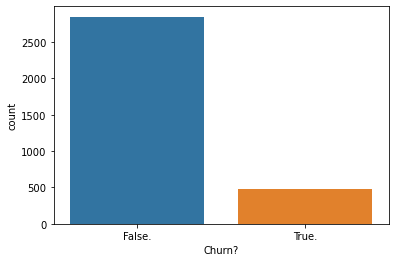

In [157]:
#représentation graphique des clients avec la bibliotheque seaborn
sns.countplot(df["Churn?"]);

In [201]:
#  Filter des clients qu'on quitte l'entreprise
filter_client = df["Churn?"]== 'True.'
filter_rester = df["Churn?"]== 'False.'
#shape[0] retourne le premier element (cad le nombre de ligne )
client_quitte = df[ filter_client ].shape[0]
client_rester= df[filter_rester].shape[0]
#Affichage des pourcentages 
print( '%.2f'%(client_rester/(client_rester + client_quitte) *100) ,"% des clients qu'on rester dans l'entreprise")
print('%.2f'%(client_quitte/(client_rester + client_quitte) *100),"% des clients qu'on quitté l'entreprise")


85.51 % des clients qu'on rester dans l'entreprise
14.49 % des clients qu'on quitté l'entreprise


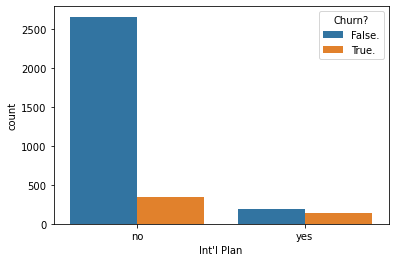

In [216]:
#Quantifions l'effet du plan international sur la variable cible
sns.countplot(x="Int'l Plan",hue="Churn?",data=df);

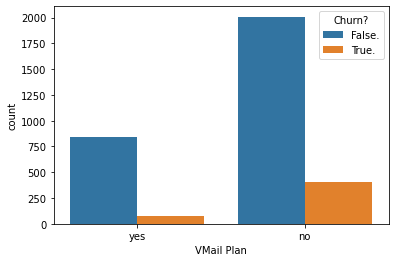

In [217]:
#Quantifions l'effet du plan Mail sur la variable cible
sns.countplot(x="VMail Plan",hue="Churn?",data=df);

- On remarque   que malgré que   le nombre de clients inscrits au plan international est inférieur à celui des clients inscrits au plan Mail, le nombre des clients qui quittent est supérieurs à celui des clients du plan mail

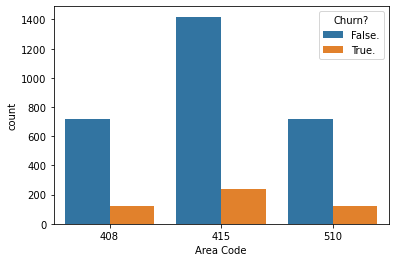

In [231]:
sns.countplot(x="Area Code",hue="Churn?",data=df);

In [233]:
pd.crosstab(df["Area Code"],df["Churn?"],margins=True)

Churn?,False.,True.,All
Area Code,,,
408,716,122,838
415,1419,236,1655
510,715,125,840
All,2850,483,3333


- cette variable "Area Code" ne donne pas vraiment une  information interssante et on ne peut pas avoir une conclusion

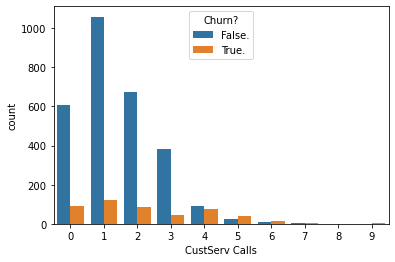

In [235]:
sns.countplot(x="CustServ Calls",hue="Churn?",data=df);

In [244]:
pd.crosstab(df["CustServ Calls"],df["Churn?"],margins=True)

Churn?,False.,True.,All
CustServ Calls,,,
0,605,92,697
1,1059,122,1181
2,672,87,759
3,385,44,429
4,90,76,166
5,26,40,66
6,8,14,22
7,4,5,9
8,1,1,2


- On remarque quand lorsque le nombre d'appels au service client augment la probablite que le client quitte augmente

In [270]:
numercal_features=df.select_dtypes(exclude=object).columns
numercal_features

Index(['Account Length', 'Area Code', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls'],
      dtype='object')

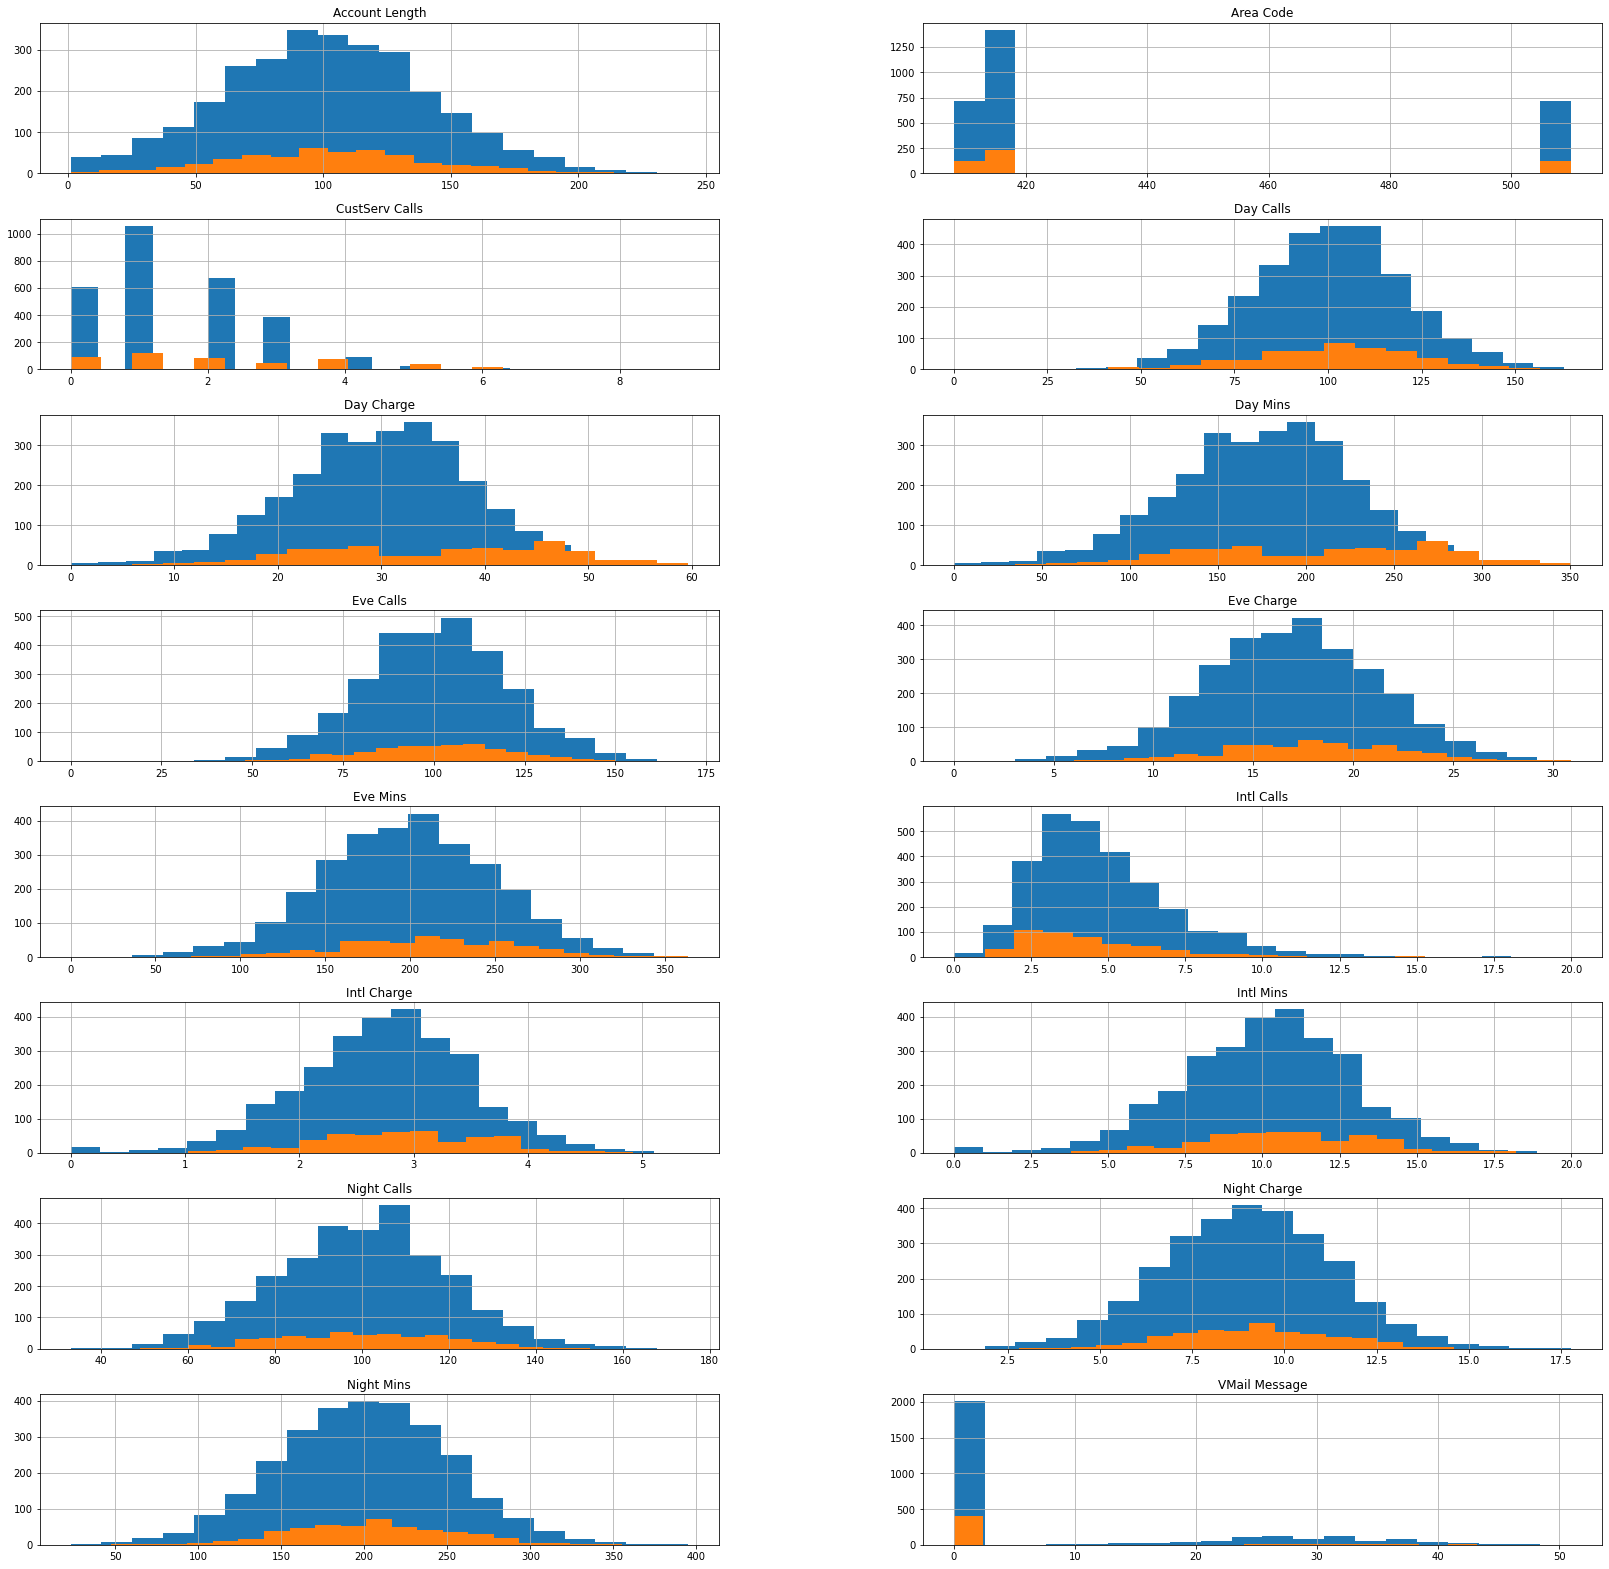

In [281]:
fig, ax=plt.subplots(8,2,figsize=(28,28))
df[filter_rester][numercal_features].hist(bins=20,ax=ax)
df[filter_client][numercal_features].hist(bins=20,ax=ax);

In [299]:
#Supression des colonnes non nécessaisre
#State,Phone
df_clean=df.drop(columns=['State','Phone'])

# Encodage Des Variables Qualitatives

In [302]:
# Encodage de la variable Int'l Plan 
# On va utiliser un LabelEncoder 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Intl_Plan_encode = le.fit_transform(df_clean["Int'l Plan"])

In [311]:
# Intl_Plan_encode est de type numpy array
# Transformation de Intl_Plan_encode vers un dataframe
Intl_Plan_encode_df = pd.DataFrame(data = Intl_Plan_encode, columns=["Int'l Plan"], index=df_clean.index)

In [314]:
le.inverse_transform(  [1]   )

array(['yes'], dtype=object)

In [315]:
le.inverse_transform(  [0]   )

array(['no'], dtype=object)

- Don pour "yes" on a 1 et pour 0 on a "no" 

In [324]:
# Encodage de la variable qualitative Area Code
# On va utiliser un One Hot Encoder
from sklearn.preprocessing import OneHotEncoder
oe = OneHotEncoder(sparse=False)
Area_code_encode = oe.fit_transform(df_clean["Area Code"].values.reshape(-1,1))
Area_code_encode

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [325]:
#voir les diffrent modalites du colonne 
oe.categories_

[array([408, 415, 510], dtype=int64)]

In [363]:
Area_code_df = pd.DataFrame(data = Area_code_encode, 
             columns = ['AreaCode 408', 'AreaCode 415', 'AreaCode 510'],
             index= df_clean.index)
Area_code_df.head()

,AreaCode 408,AreaCode 415,AreaCode 510
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0


- On a 3 colonnes sont auto-corrélées.
- On supprime une colonne.

In [373]:
Area_code_df = Area_code_df.drop(columns=["AreaCode 408"])

In [374]:
Area_code_df.head()

,AreaCode 415,AreaCode 510
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,0.0
4,1.0,0.0


In [362]:
# Encodage de la variable qualitative VMail Plan
# On va utiliser Get dummies
# drop_first=True drops one column from the resulted dummy features. The purpose is to avoid multicollinearity. 
VMailPlane_encode_df = pd.get_dummies(df["VMail Plan"], prefix='VMail Plan', drop_first=True)
# X head
VMailPlane_encode_df.head()

,VMail Plan_yes
0,1
1,1
2,0
3,0
4,0


In [369]:
#Concaténation des 4 dataframes
df_clean = df_clean.drop(columns= ["Area Code", "VMail Plan","Int'l Plan"] )

In [370]:
df_encode = pd.concat([df_clean, Area_code_df, Intl_Plan_encode_df,VMailPlane_encode_df ] , axis = 1)


In [398]:
# Encodage de la variable cible Churn?
Chrun_encode = le.fit_transform(df_encode["Churn?"])
Chrun_encode_df = pd.DataFrame(data = Chrun_encode, columns=["Churn?"], index=df_encode.index)

In [401]:
df_encode.drop(columns= ["Churn?"] ,inplace=True)
df_encode.head()

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,AreaCode 415,AreaCode 510,Int'l Plan,VMail Plan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,1.0,0.0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,1.0,0.0,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,1.0,0.0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0.0,0.0,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1.0,0.0,1,0


In [402]:
df_encode = pd.concat([df_encode, Chrun_encode_df] , axis = 1)
df_encode.head()

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,AreaCode 415,AreaCode 510,Int'l Plan,VMail Plan_yes,Churn?
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,1.0,0.0,0,1,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,1.0,0.0,0,1,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,1.0,0.0,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0.0,0.0,1,0,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1.0,0.0,1,0,0


In [403]:
df_encode.shape


(3333, 20)

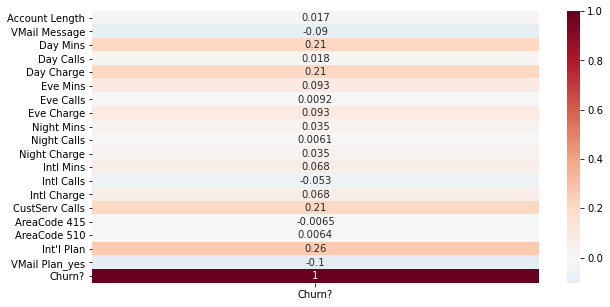

In [407]:
# ON peur avoir maintenant nune idée sur la correlation entre la variable Churn et les autres variables
plt.figure(figsize=(10,5))
sns.heatmap(df_encode.corr()[['Churn?']],cmap="RdBu_r",center=0.0, annot=True);